In [1]:
import sys
sys.path.append("/Users/deepak.gupta/eff-dl/trailmet/")

In [2]:
# load important packages
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from trailmet.datasets.classification import DatasetFactory

In [3]:
root = "/Users/deepak.gupta/eff-dl/data_dir"

### Loading CIFR10 Dataset

In [4]:
train_transform = transforms.Compose(
[transforms.ToTensor()])

val_transform = transforms.Compose(
[transforms.ToTensor()])

test_transform = transforms.Compose(
[transforms.ToTensor()])

transforms1 = {
    'train': train_transform, 
    'val': val_transform, 
    'test': test_transform}
def train_target_transform(label):
    return label

def val_target_transform(label):
    return label

def test_target_transform(label):
    return label

target_transforms = {
    'train': None, 
    'val': None, 
    'test': None}


cifar_dataset = DatasetFactory.create_dataset(name = 'CIFAR10', 
                                        root = root,
                                        split_types = ['train', 'val', 'test'],
                                        val_fraction = 0.2,
                                        transform = transforms1,
                                        target_transform = target_transforms
                                        )

99.7%

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Construct dataloader
train_loader = torch.utils.data.DataLoader(
        cifar_dataset['train_dataset'], batch_size=64, 
        sampler=cifar_dataset['train_sampler'],
        num_workers=0
    )

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


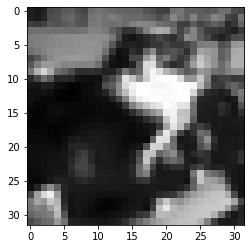

Label: 8


In [9]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[7,0,:,:].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")